In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [33]:
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [8]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244

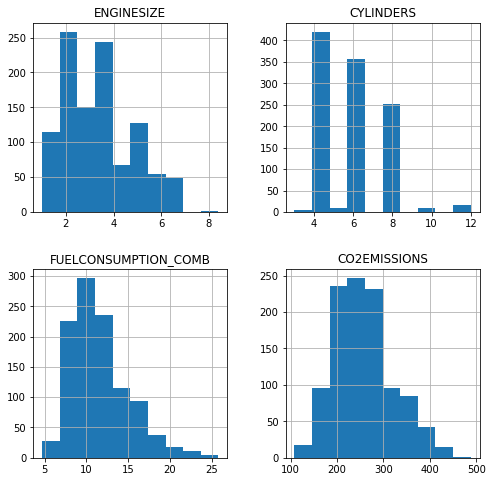

In [14]:
cdf.hist(figsize=(8, 8))
plt.show()

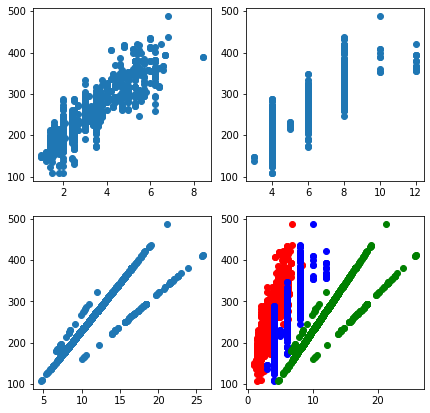

In [32]:
fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_subplot(221)
ax1.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
ax2 = fig.add_subplot(222)
ax2.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
ax3 = fig.add_subplot(223)
ax3.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
ax4 = fig.add_subplot(224)
ax4.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "red")
ax4.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = "blue")
ax4.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = "green")

plt.show()

### I didn't understand the following code:

```
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('AmesHousing.csv')


fig, ax = plt.subplots(2, figsize=(10, 6)) <=======(?)

ax[0].scatter(x = df['Gr Liv Area'], y = df['SalePrice'])
ax[0].set_xlabel("Living Area Above Ground")
ax[0].set_ylabel("House Price")

ax[1].scatter(x = df['Overall Qual'], y = df['SalePrice'])
ax[1].set_xlabel("Overall Quality")
ax[1].set_ylabel("House Price")

plt.show()
```

In [147]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

print("len train: ", len(train))
print("len test: ", len(test))
print("len cdf: ", len(cdf))

len train:  867
len test:  200
len cdf:  1067


In [148]:
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [149]:
regr = linear_model.LinearRegression()
regr.fit(train_x_poly, train_y)

print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [[ 0.         49.08784637 -1.33385995]]
Intercept:  [109.17701654]


Text(0, 0.5, 'Emission')

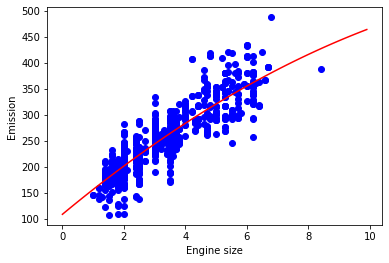

In [150]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
xx = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0] + regr.coef_[0][1] * xx + regr.coef_[0][2] * np.power(xx, 2)
plt.plot(xx, yy, "-r")
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [151]:
test_x_poly = poly.transform(test_x)
test_y_ = regr.predict(test_x_poly)

print("R2-score: %.2f" % r2_score(test_y, test_y_))

R2-score: 0.74
